In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter


In [141]:
class KNN:
    def __init__(self, x_train, y_train, k=3, distance_func = "euclidean") -> None:
        self.x_train = x_train
        self.y_train = y_train
        self.k = k
        self.distance_func = self.euclidean if distance_func == "euclidean" else self.manhattan

    def forward(self,x):
        distances = self.distance_func(x)
        indices = np.argsort(distances)[:self.k]
        labels = [self.y_train[i] for i in indices]
        return Counter(labels).most_common(1)[0][0]

    def euclidean(self,x):
        return np.sqrt(np.sum((self.x_train - x) ** 2,axis = 1))

    def manhattan(self,x):
        return np.sum(np.abs(self.x_train - x), axis=1)



In [167]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=4,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=34,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)


In [173]:
model = KNN(X_train, y_train, distance_func = "manhattan")

num_of_tests = len(X_test)
correct_predictions = 0
for i in range(num_of_tests):
    label = y_test[i]
    prediction = model.forward(X_test[i])
    if(prediction == label):
        correct_predictions += 1
print("Accuracy:", correct_predictions / num_of_tests * 100)
        



Accuracy: 90.0


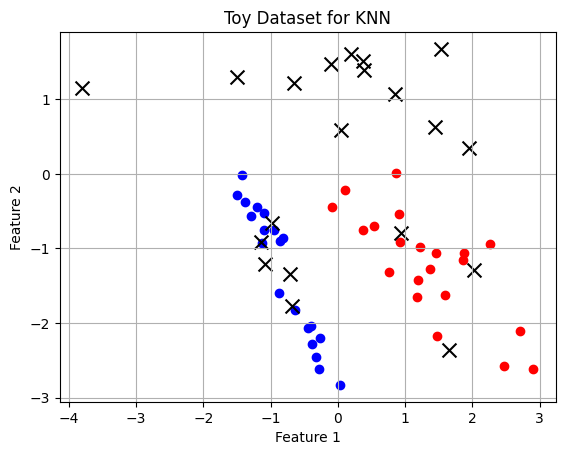

In [172]:
plt.figure()
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color="blue", label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color="red", label="Class 1")
plt.scatter(X_test[:, 0], X_test[:, 1], color="black", label="Test Set", marker="x", s=100)
plt.title("Toy Dataset for KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()